In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings 
warnings.filterwarnings("ignore")

# Data preprocessing

In [10]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("StudentsPerformance.csv")

print(f"The dataframe has {len(df)} rows and {len(df.columns)} columns")
print()
#print(f"{df.shape}")
#print()

# Check missing values
missing_values = df.isnull().sum()
print(f"Here's a summary of the missing values.")
print()
print(missing_values)
print()


# Check duplicates
duplicate_values = df.duplicated().sum()
print(f"Here's a summary of the duplicate values.")
print()
print(duplicate_values)
print()


# Check datatypes 
print(f"Here's a summary of the data types.")
print()
data_type = df.info()
print()


# Check number of unique values  
unique_values = df.nunique()
print(f"Here's a summary of the unique values.")
print()
print(unique_values)


The dataframe has 1000 rows and 8 columns

Here's a summary of the missing values.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Here's a summary of the duplicate values.

0

Here's a summary of the data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   i

# Data exploration - description

In [22]:
# String columns
print(f"Categories in 'gender' variable: {df['gender'].unique()}")
print()
print(f"Categories in 'race/ethnicity' variable: {df['race/ethnicity'].unique()}")
print()
print(f"Categories in 'parental level of education' variable: {df['parental level of education'].unique()}")
print()
print(f"Categories in 'lunch' variable: {df['lunch'].unique()}")
print()
print(f"Categories in 'test preparation course' variable: {df['test preparation course'].unique()}")

Categories in 'gender' variable: ['female' 'male']

Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable: ['standard' 'free/reduced']

Categories in 'test preparation course' variable: ['none' 'completed']


In [29]:
# Numeric columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print(f"We have {len(numeric_features)} numerical features. These are {numeric_features}")
print(f"We have {len(categorical_features)} numerical features. These are {categorical_features}")


We have 3 numerical features. These are ['math score', 'reading score', 'writing score']
We have 5 numerical features. These are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Data exploration - visualisation

### Gender Column

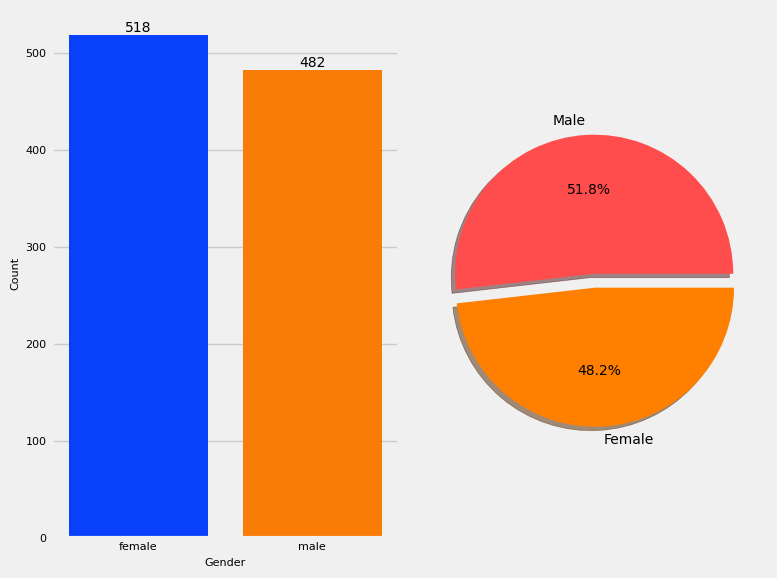

In [137]:
# Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(8,6))

# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],
              data=df,
              palette ='bright',
              ax=ax[0],
              saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,
                    color='black',
                    size=10)


# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=8)
ax[0].set_ylabel('Count', fontsize=8)
ax[0].tick_params(labelsize=8)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),
        labels=['Male','Female'],
        explode=[0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=['#ff4d4d','#ff8000'], 
        textprops={'fontsize': 10})

# Adjust layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save figure
plt.savefig('GenderSplit.png', bbox_inches='tight')

# Display the plot
plt.show()


### Insights:
##### - Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### Race/Ethnicity column

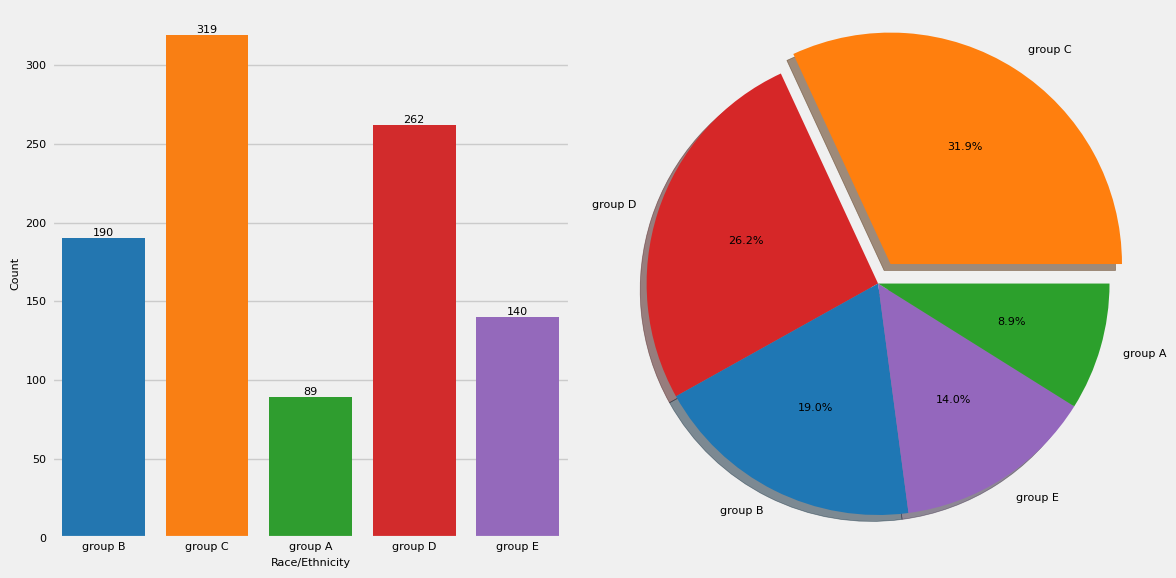

In [142]:
# Define a color palette for the countplot
# blue, orange, green, red, purple are respectively the color names for the color codes used belwo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 

# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity' column and add labels to the bars
sns.countplot(x=df['race/ethnicity'],
              data=df, 
              palette=colors, ax=ax[0], 
              saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, 
                    color='black',
                    size=8)
    

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Race/Ethnicity', fontsize=8)
ax[0].set_ylabel('Count', fontsize=8)
ax[0].tick_params(labelsize=8)


# Create a dictionary that maps category names to colors in the color palette
color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

# Map the colors to the pie chart slices
pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]


# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
plt.pie(x=df['race/ethnicity'].value_counts(), 
        labels=df['race/ethnicity'].value_counts().index, 
        explode=[0.1, 0, 0, 0, 0], 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=pie_colors, 
        textprops={'fontsize': 8})

# Set the aspect ratio of the pie chart to 'equal' to make it a circle
plt.axis('equal')

# Adjust layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save figure
plt.savefig('Race_EthinicitySplit.png', bbox_inches='tight')

# Display the plot
plt.show()

### Insights:
##### - Most of the student belonging from group C /group D.
##### - Lowest number of students belong to group A.

### Parental Level of Education Column


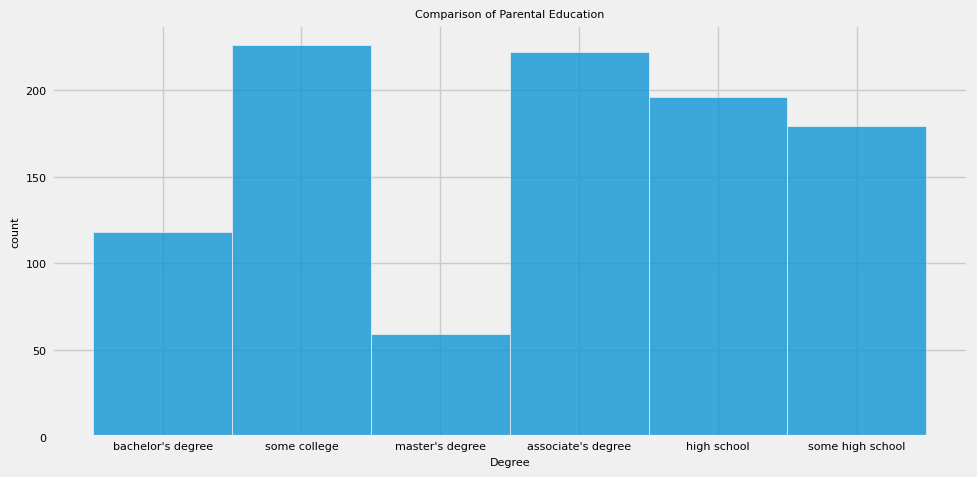

In [135]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.style.use('fivethirtyeight')

sns.histplot(df["parental level of education"], 
             palette = 'Blues')

plt.title('Comparison of Parental Education', 
          fontweight = 8, 
          fontsize = 8)

plt.xlabel('Degree', fontsize=8)
plt.ylabel('count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adjust layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save figure
plt.savefig('CompareParentalEducation.png', bbox_inches='tight')

# Display the plot
plt.show()

### Insights:
##### - Largest number of parents are from college.

### Bivariate Analysis

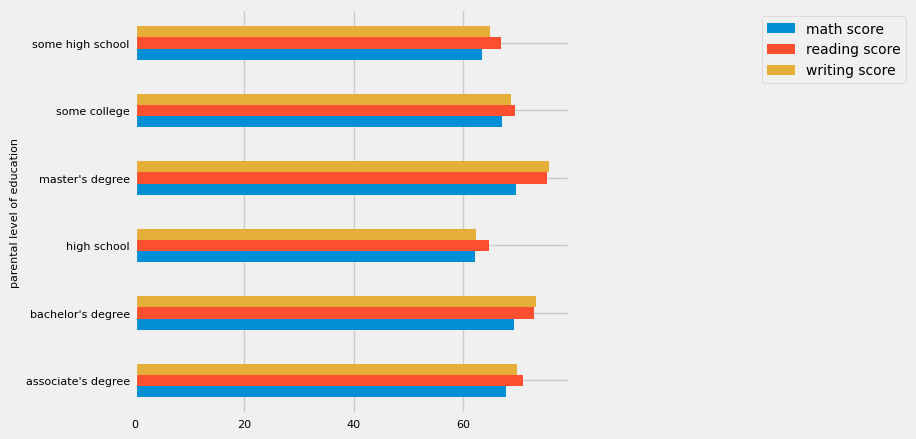

In [133]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',
                                                           figsize=(5,5))

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0.)

plt.ylabel('parental level of education', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.79, 1), fontsize=10) 

# Adjust layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save figure
plt.savefig('ParentalEducation_StudentPerformance.png', bbox_inches='tight')

# Display the plot
plt.show()

### Insights:
##### - The score of student whose parents possess master and bachelor level education are higher than others.

### Maximum Score of Students in All Three Subjects

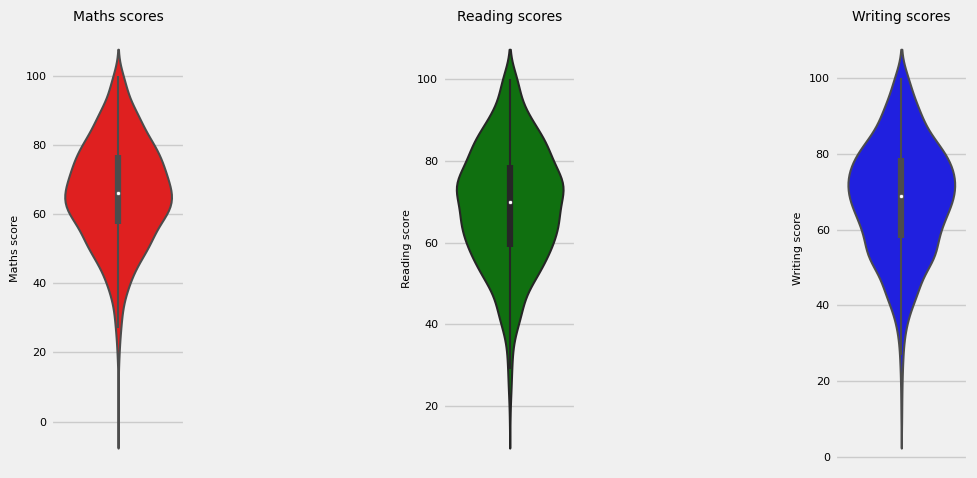

In [134]:
figsize=(18,8)

# Maths
plt.subplot(1, 5, 1) 
plt.title('Maths scores', fontsize=10)
sns.violinplot(y='math score',
               data=df,
               color='red',
               linewidth=1.5) 
plt.ylabel('Maths score', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)




# Reading
plt.subplot(1, 5, 3)
plt.title('Reading scores', fontsize=10)
sns.violinplot(y='reading score',
               data=df,
               color='green',
               linewidth=1.5) 
plt.ylabel('Reading score', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)



# Writing
plt.subplot(1, 5, 5) 
plt.title('Writing scores', fontsize=10) 
sns.violinplot(y='writing score',
               data=df,
               color='blue',
               linewidth=1.5) 
plt.ylabel('Writing score', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adjust layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save figure
plt.savefig('ViolinPlots.png', bbox_inches='tight')

# Display the plot
plt.show()

### Insights:
##### - From the above three plots its clearly visible that most of the students score in between:
#####     - 60-80 in Maths, and  
#####     - 50-80 in reading and writing 

### Multivariate Analysis Using Pie Plot

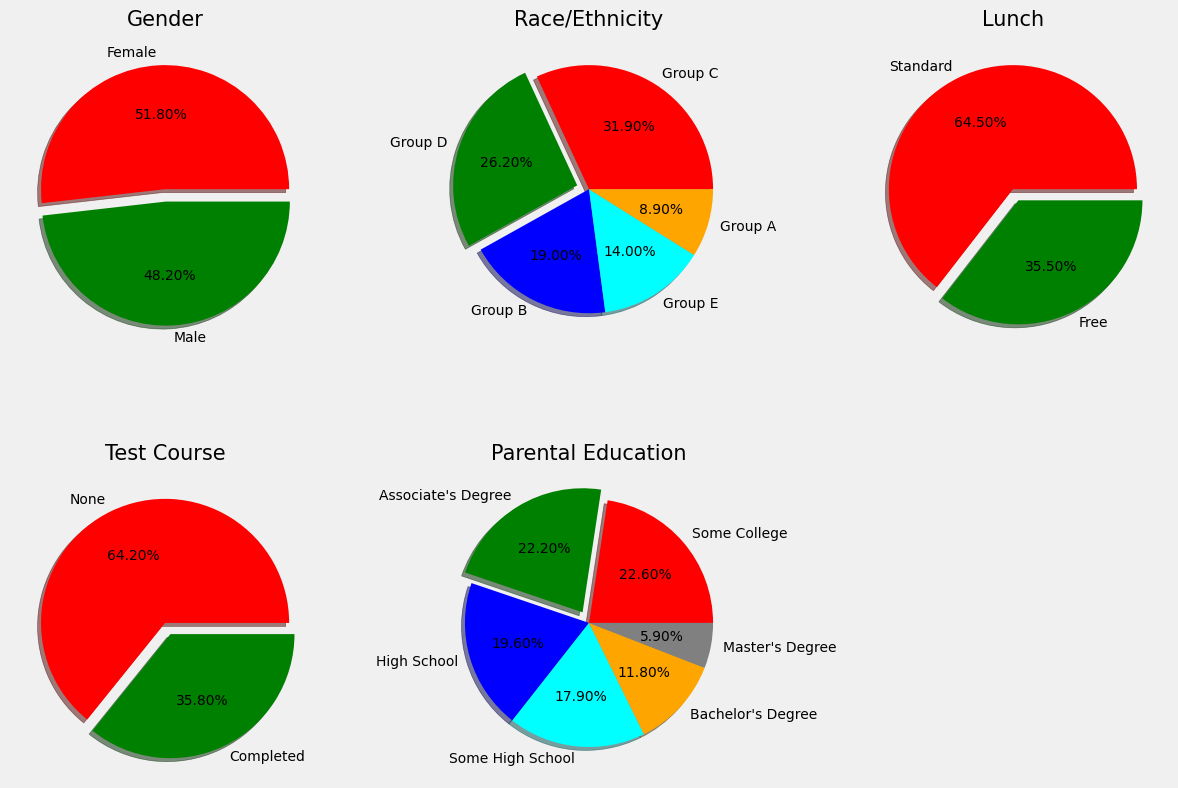

In [159]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0, 0.1], textprops={'fontsize': 10})
plt.title('Gender', fontsize=15)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0, 0.1, 0, 0, 0], textprops={'fontsize': 10})
plt.title('Race/Ethnicity', fontsize=15)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0, 0.1], textprops={'fontsize': 10})
plt.title('Lunch', fontsize=15)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0, 0.1], textprops={'fontsize': 10})
plt.title('Test Course', fontsize=15)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0, 0.1, 0, 0, 0, 0], textprops={'fontsize': 10})
plt.title('Parental Education', fontsize=15)
plt.axis('off')

# Adjust layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save figure
plt.savefig('Pies.png', bbox_inches='tight')

# Display the plot
plt.show()

#### Insights>Insights

##### - The number of Male and Female students is almost equal.
##### - The number of students is higher in Group C.
##### - The number of students who have standard lunch is greater.
##### - The number of students who have not enrolled in any test preparation course is greater.
##### - The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.
##### - From the above plot, it is clear that all the scores increase linearly with each other.

##### - Student’s Performance is related to lunch, race, and parental level education.

##### - Females lead in pass percentage and also are top-scorers.
##### - Student Performance is not much related to test preparation course.
##### - The finishing preparation course is beneficial.

In [109]:
# Statistics

np.random.seed(6)

# 200 random values of math score is taken from the dataset of 1000 values.
random_math_marks = np.random.choice(a= df['math score'], size=200)

# getting the sample mean
print ("Sample mean for Math Scores:", random_math_marks.mean() )          

# getting the overall mean
print("Population mean for Math Scores:", df['math score'].mean())

# 200 random values of reading score is taken from the dataset of 1000 values.
random_reading_marks = np.random.choice(a= df['reading score'], size=200)

# getting the sample mean
print ("\nSample mean for Reading Scores:", random_reading_marks.mean() )          

# getting the overall mean
print("Population mean for Reading Scores:", df['reading score'].mean())

#  200 random values of writing score is taken from the dataset of 1000 values.
random_writing_marks = np.random.choice(a=df['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", random_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", df['writing score'].mean())

print()
stdevm = df['math score'].std()  
print("standard deviation of math score is",stdevm)

stdevr = df['reading score'].std()  
print("standard deviation of reading score is",stdevr)

stdevw = df['writing score'].std()  
print("standard deviation of writing score is",stdevw)

Sample mean for Math Scores: 64.75
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 71.505
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 64.75
Population mean for Writing Scores: 68.054

standard deviation of math score is 15.16308009600945
standard deviation of reading score is 14.600191937252216
standard deviation of writing score is 15.19565701086965
